In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('logs_dataset.csv')
df.head()

,timestamp,source,log_message,target_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status


In [3]:
df.shape

(2410, 4)

In [4]:
df.target_label.unique()

array(['HTTP Status', 'Critical Error', 'Security Alert', 'Error',
       'System Notification', 'Resource Usage', 'User Action',
       'Workflow Error', 'Deprecation Warning'], dtype=object)

In [5]:
df.source.unique()

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI', 'LegacyCRM'], dtype=object)

In [6]:
dict={}
for val in df.source.unique():
    dict[val]=df[df['source']==val].target_label.unique()
dict

{'ModernCRM': array(['HTTP Status', 'Critical Error', 'Error', 'System Notification',
        'User Action', 'Resource Usage', 'Security Alert'], dtype=object),
 'AnalyticsEngine': array(['Security Alert', 'HTTP Status', 'System Notification', 'Error',
        'User Action', 'Resource Usage', 'Critical Error'], dtype=object),
 'ModernHR': array(['HTTP Status', 'Error', 'System Notification', 'Critical Error',
        'Security Alert', 'Resource Usage', 'User Action'], dtype=object),
 'BillingSystem': array(['HTTP Status', 'System Notification', 'Security Alert',
        'Resource Usage', 'Critical Error', 'Error', 'User Action'],
       dtype=object),
 'ThirdPartyAPI': array(['Resource Usage', 'Security Alert', 'System Notification',
        'HTTP Status', 'User Action', 'Critical Error', 'Error'],
       dtype=object),
 'LegacyCRM': array(['Workflow Error', 'Deprecation Warning'], dtype=object)}

### Clustering

In [11]:
from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer

In [14]:
import os

# Set a higher timeout in seconds (e.g., 600 seconds = 10 minutes)
os.environ['HF_HUB_DOWNLOAD_TIMEOUT'] = '600'

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['log_message'].tolist())

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [18]:
embeddings.shape

(2410, 384)

In [19]:
clustering=DBSCAN(min_samples=1,eps=0.2,metric='cosine').fit(embeddings)
df['cluster']=clustering.labels_

In [39]:
df.cluster.value_counts()

cluster
0      1017
5       147
11      100
13       86
7        60
       ... 
131       1
132       1
133       1
134       1
135       1
Name: count, Length: 136, dtype: int64

In [23]:
df[df['cluster']==0].target_label.unique()

array(['HTTP Status'], dtype=object)

In [68]:
for index,val in df.cluster.value_counts().items():
    print(index,val,'----->',df[df['cluster']==index].target_label.unique())

0 1017 -----> ['HTTP Status']
5 147 -----> ['Resource Usage']
11 100 -----> ['User Action']
13 86 -----> ['System Notification']
7 60 -----> ['Security Alert']
8 60 -----> ['System Notification']
21 58 -----> ['System Notification']
3 57 -----> ['Error']
4 53 -----> ['System Notification']
17 52 -----> ['Security Alert']
6 51 -----> ['Critical Error']
32 51 -----> ['System Notification']
16 48 -----> ['System Notification']
20 48 -----> ['Security Alert']
9 44 -----> ['User Action']
1 39 -----> ['Critical Error' 'Error']
10 30 -----> ['Resource Usage']
34 25 -----> ['Security Alert']
53 20 -----> ['Error']
14 20 -----> ['Critical Error']
52 20 -----> ['Error']
18 17 -----> ['Critical Error']
42 13 -----> ['Security Alert']
25 13 -----> ['Critical Error']
59 12 -----> ['Security Alert']
26 11 -----> ['Security Alert']
31 8 -----> ['Security Alert']
51 8 -----> ['Error']
70 6 -----> ['Security Alert']
12 6 -----> ['Security Alert']
45 6 -----> ['Security Alert']
38 6 -----> ['Security Al

In [29]:
df[df['cluster']==23]

,timestamp,source,log_message,target_label,cluster
55,6/18/2025 11:21,AnalyticsEngine,Server 34 crashed unexpectedly while syncing data,Error,23
1043,11/9/2025 19:53,ThirdPartyAPI,Server 44 crashed unexpectedly while syncing data,Error,23
2034,11/25/2025 12:27,ModernCRM,Server 43 crashed unexpectedly while syncing data,Error,23


In [31]:
df[df['cluster']==22]

,timestamp,source,log_message,target_label,cluster
51,8/19/2025 5:58,ThirdPartyAPI,Server 4 restarted without warning during data...,Error,22
187,8/26/2025 11:40,ModernCRM,Server 46 restarted without warning during dat...,Error,22
1690,12/6/2025 2:36,BillingSystem,Server 7 restarted without warning during data...,Error,22


In [57]:
temp=df.cluster.value_counts()
temp=temp[temp>10]
for index,val in temp.items():
    # print(index,val)
    logs=df[df['cluster']==index]['log_message'][:5].values
    print(f'cluster {index,val}------>Messages:\n{logs}\n')

cluster (0, 1017)------>Messages:
['nova.osapi_compute.wsgi.server [req-b9718cd8-f65e-49cc-8349-6cf7122af137 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" status: 200 len: 1893 time: 0.2675118'
 'nova.osapi_compute.wsgi.server [req-4895c258-b2f8-488f-a2a3-4fae63982e48 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" HTTP status code -  200 len: 211 time: 0.0968180'
 'nova.osapi_compute.wsgi.server [req-ee8bc8ba-9265-4280-9215-dbe000a41209 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" RCODE  200 len: 1874 time: 0.2280791'
 'nova.osapi_compute.wsgi.server [req-f0bffbc3-5ab0-4916-91c1-0a61dd7d4ec2 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "G

In [67]:
df[df['cluster']==0].target_label.unique()

array(['HTTP Status'], dtype=object)

In [69]:
import re
def classify_with_regex(log_message):
    regex_patterns = {
        r"User User\d+ logged (in|out).": "User Action",
        r"Backup (started|ended) at .*": "System Notification",
        r"Backup completed successfully.": "System Notification",
        r"System updated to version .*": "System Notification",
        r"File .* uploaded successfully by user .*": "System Notification",
        r"Disk cleanup completed successfully.": "System Notification",
        r"System reboot initiated by user .*": "System Notification",
        r"Account with ID .* created by .*": "User Action"
    }
    for pattern, label in regex_patterns.items():
        if re.search(pattern, log_message):
            return label
    return None

In [113]:
print(classify_with_regex("User User123 logged in."))
print(classify_with_regex("System reboot initiated by user User179."))

User Action
System Notification


In [72]:
df['regex_label']=df['log_message'].apply(lambda x: classify_with_regex(x))
df.head()

,timestamp,source,log_message,target_label,cluster,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,0,None


In [75]:
df[df['regex_label'].notna()]

,timestamp,source,log_message,target_label,cluster,regex_label
7,10/11/2025 8:44,ModernHR,File data_6169.csv uploaded successfully by us...,System Notification,4,System Notification
14,1/4/2025 1:43,ThirdPartyAPI,File data_3847.csv uploaded successfully by us...,System Notification,4,System Notification
15,5/1/2025 9:41,ModernCRM,Backup completed successfully.,System Notification,8,System Notification
18,2/22/2025 17:49,ModernCRM,Account with ID 5351 created by User634.,User Action,9,User Action
27,9/24/2025 19:57,ThirdPartyAPI,User User685 logged out.,User Action,11,User Action
...,...,...,...,...,...,...
2376,6/27/2025 8:47,ModernCRM,System updated to version 2.0.5.,System Notification,21,System Notification
2381,9/5/2025 6:39,ThirdPartyAPI,Disk cleanup completed successfully.,System Notification,32,System Notification
2394,4/3/2025 13:13,ModernHR,Disk cleanup completed successfully.,System Notification,32,System Notification
2395,5/2/2025 14:29,ThirdPartyAPI,Backup ended at 2025-05-06 11:23:16.,System Notification,13,System Notification


In [76]:
df_nonregex=df[df['regex_label'].isnull()]
df_nonregex.shape

(1910, 6)

### BERT

In [80]:
df_nonregex.target_label.value_counts()

target_label
HTTP Status            1017
Security Alert          371
Error                   177
Resource Usage          177
Critical Error          161
Workflow Error            4
Deprecation Warning       3
Name: count, dtype: int64

In [83]:
cols=['Workflow Error','Deprecation Warning']
df_bert=df_nonregex[~df_nonregex['target_label'].isin(cols)]
df_bert.target_label.value_counts()

target_label
HTTP Status       1017
Security Alert     371
Error              177
Resource Usage     177
Critical Error     161
Name: count, dtype: int64

In [84]:
filtered_embeddings=model.encode(df_bert['log_message'].tolist())
filtered_embeddings.shape

(1903, 384)

In [104]:
X=filtered_embeddings
y=df_bert['target_label'].values

X_train, X_test, y_train, y_test,train_original_indices,test_original_indices = train_test_split(X, y,df_bert.index, test_size=0.3, random_state=42)
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

Critical Error       0.91      1.00      0.95        48
         Error       0.98      0.89      0.93        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      0.99      1.00       123

      accuracy                           0.99       571
     macro avg       0.98      0.98      0.98       571
  weighted avg       0.99      0.99      0.99       571



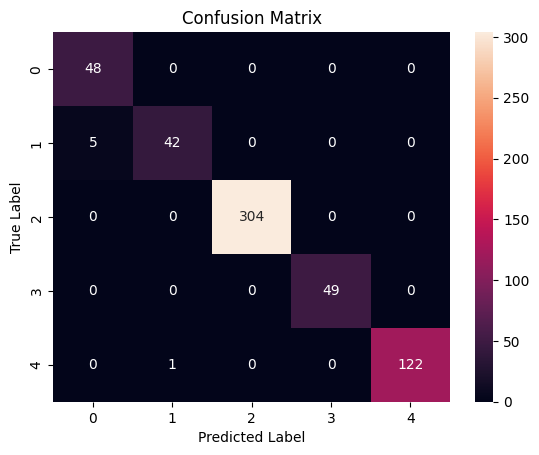

In [105]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [108]:
misclassified_mask_in_test_set = (y_pred != y_test)
original_indices_of_misclassified = test_original_indices[misclassified_mask_in_test_set]
wrongly_predicted_df_rows = df_bert.loc[original_indices_of_misclassified].copy()
wrongly_predicted_df_rows['predicted_label'] = y_pred[misclassified_mask_in_test_set]

In [109]:
wrongly_predicted_df_rows

,timestamp,source,log_message,target_label,cluster,regex_label,predicted_label
2312,3/9/2025 21:16,ModernHR,Email service faced a delivery obstacle,Error,1,None,Critical Error
1414,6/22/2025 23:07,ModernCRM,Email system encountered a sending error,Error,1,None,Critical Error
1175,4/21/2025 2:17,AnalyticsEngine,Unapproved data transfer attempt was detected,Security Alert,97,None,Error
1867,10/6/2025 11:04,ModernCRM,Email service had a sending malfunction,Error,1,None,Critical Error
926,2/17/2025 8:01,ModernCRM,Email service suffered a delivery failure,Error,1,None,Critical Error
217,1/22/2025 5:45,BillingSystem,Mail service encountered a delivery glitch,Error,1,None,Critical Error


In [ ]:
import joblib
joblib.dump(clf,'../Models/log_classifier.joblib')

['log_classifier.joblib']